In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments/EastWestAirlines_CSV.csv',index_col=0)

In [4]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.shape

(3999, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [7]:
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['Award?'].value_counts()

,count
Award?,
0,2517
1,1481


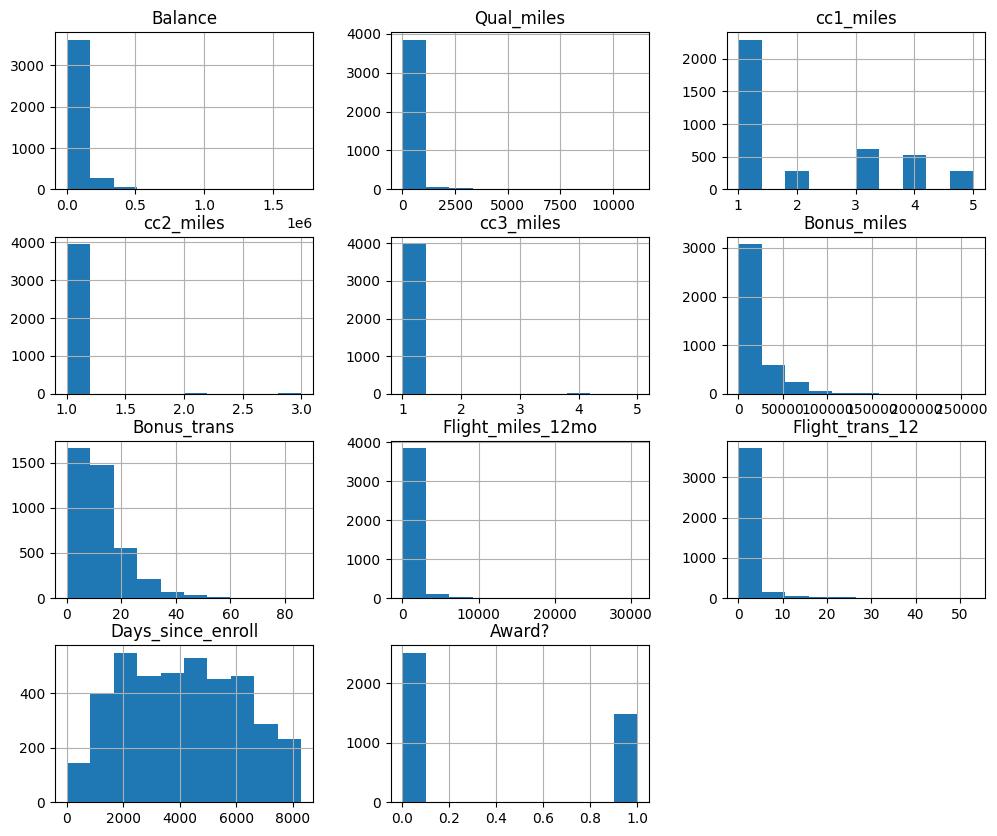

In [11]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,10))
plt.show()


## **Observations From Histogram**

* **Balance, Bonus_miles, Flight_miles_12mo** :- heavily right-skewed
* **Qual_miles, cc2_miles, cc3_miles** :- almost all values are zero
* **cc1_miles** :- looks categorical
* **Days_since_enroll** :- fairly uniform spread.

<Axes: >

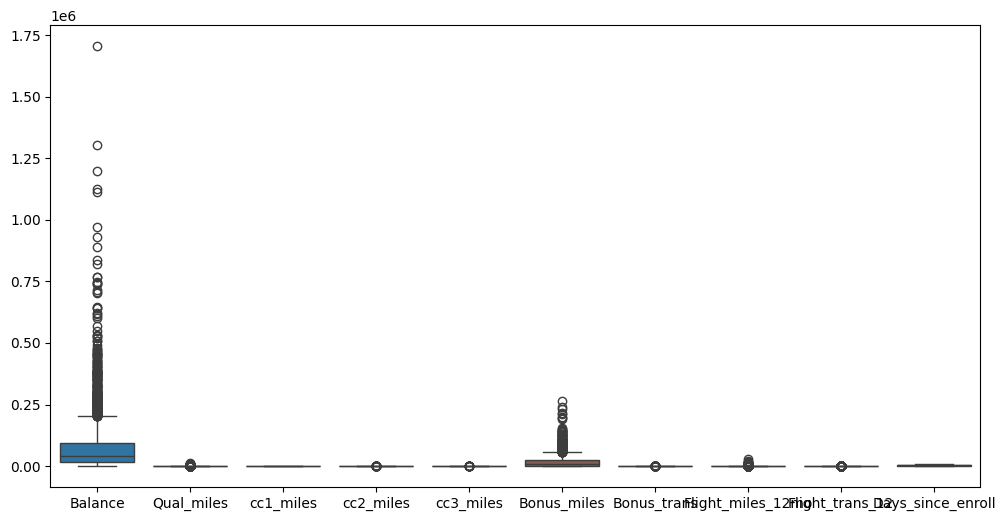

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Award?']))


In [13]:
def outliers(data):
  data_num = data.select_dtypes(include = 'number')

  for col in data_num:
      q1 = data[col].quantile(0.25)
      q3 = data[col].quantile(0.75)

      IQR = q3-q1
      lower_bound = q1 - 1.5*IQR
      upper_bound = q3 + 1.5*IQR

      data[col] = np.where(data[col] < lower_bound, lower_bound,
                      np.where(data[col] > upper_bound, upper_bound, data[col]))

  return data

In [14]:
df = outliers(df)

<Axes: >

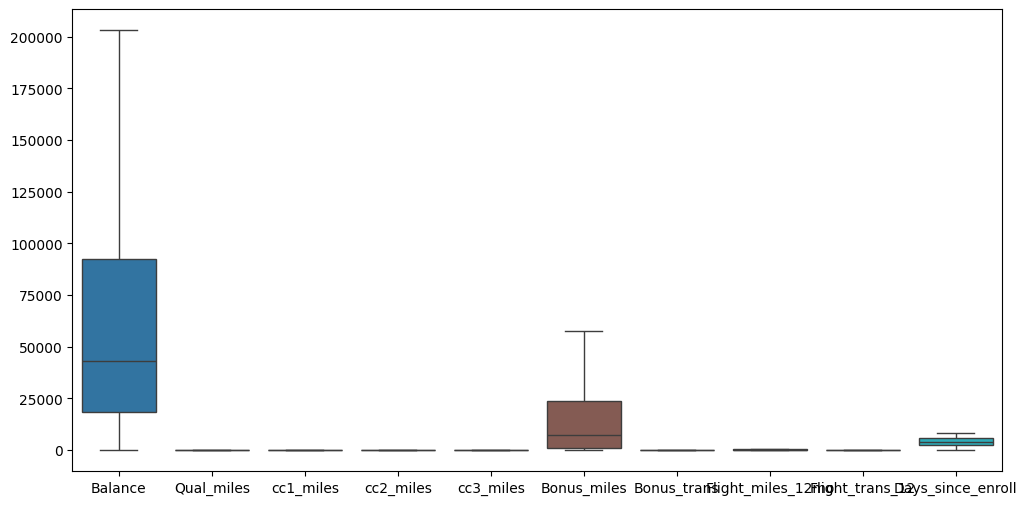

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Award?']))


<Axes: >

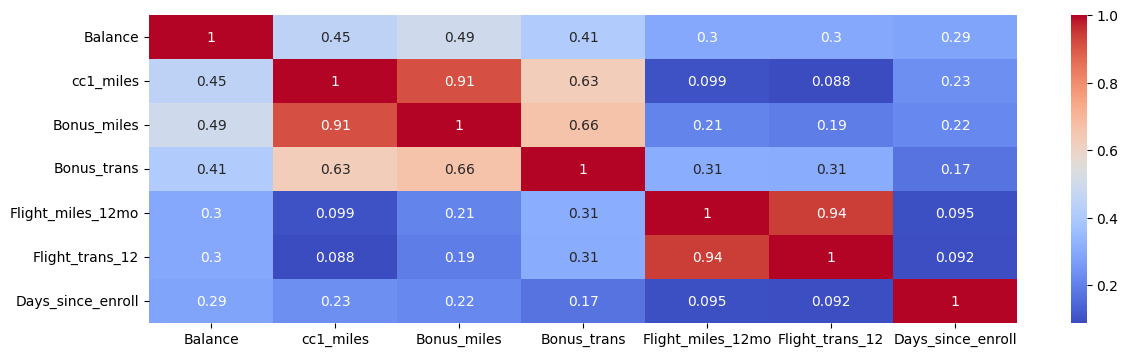

In [16]:
df_corr = df[['Balance', 'cc1_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']]
plt.figure(figsize=(14,4))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")


In [17]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.00,0.0,7000.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.00,0.0,6968.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.00,0.0,7034.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.00,0.0,6952.0,0.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,783.75,2.5,6935.0,1.0


In [18]:
df_new = df.drop(columns=['cc1_miles','Flight_miles_12mo','Bonus_trans'])

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler
X = df_new.select_dtypes(include=[np.number]).copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_p = pca.fit_transform(X_scaled)


In [21]:
scores = {}
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_p)
    scores[k] = silhouette_score(X_p, labels)

In [22]:
scores

{2: np.float64(0.32351080593875625),
 3: np.float64(0.30606335884769076),
 4: np.float64(0.3189912866612429),
 5: np.float64(0.28835422886299483),
 6: np.float64(0.30056100395352525),
 7: np.float64(0.3107342928936951),
 8: np.float64(0.32660380234897457),
 9: np.float64(0.3331218933831135),
 10: np.float64(0.3314211956823074)}

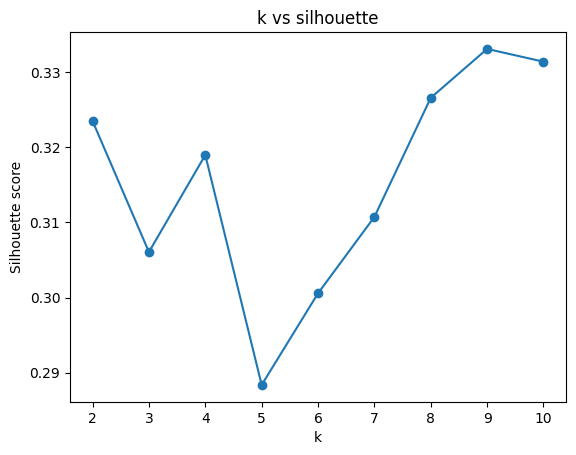

Best k : 9 score: 0.3331218933831135


In [23]:
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('k vs silhouette')
plt.show()

best_k = max(scores, key=scores.get)
print("Best k :", best_k, "score:", scores[best_k])

In [24]:
from sklearn.metrics import silhouette_samples
km = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = km.fit_predict(X_p)
samps = silhouette_samples(X_p, labels)
df_loc = df.copy()
df_loc = df_loc.loc[X.index]
df_loc['cluster'] = labels
df_loc['silhouette'] = samps
df_loc.sort_values('silhouette',ascending=True).head(10)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,silhouette
ID#,,,,,,,,,,,,,
1506,106509.0,0.0,1.0,1.0,1.0,1113.0,7.0,0.0,0.0,5036.0,0.0,3,-0.192833
1169,100443.0,0.0,3.0,1.0,1.0,12744.0,21.0,0.0,0.0,5492.0,0.0,3,-0.183131
1812,104052.0,0.0,2.0,1.0,1.0,6016.0,12.0,0.0,0.0,4331.0,0.0,3,-0.174416
745,104665.0,0.0,2.0,1.0,1.0,9547.0,12.0,0.0,0.0,6249.0,0.0,3,-0.156111
1570,63362.0,0.0,3.0,1.0,1.0,16331.0,15.0,350.0,1.0,3544.0,0.0,5,-0.155398
2128,109790.0,0.0,1.0,1.0,1.0,16108.0,4.0,0.0,0.0,3123.0,0.0,3,-0.149756
2297,105957.0,0.0,1.0,1.0,1.0,4881.0,12.0,0.0,0.0,3859.0,0.0,3,-0.145049
2156,99704.0,0.0,2.0,1.0,1.0,15750.0,12.0,0.0,0.0,4106.0,0.0,3,-0.142361
950,90855.0,0.0,3.0,1.0,1.0,23992.0,13.0,0.0,0.0,5919.0,0.0,8,-0.138719


In [25]:
agg = AgglomerativeClustering(n_clusters=2,linkage='ward')
agg1 = agg.fit(X_p)

In [26]:
clusters = agg1.labels_
np.unique(clusters)

array([0, 1])

In [27]:
silhouette_score(X_p,agg1.labels_)

np.float64(0.27824405423185067)

In [28]:
eps = np.arange(0.1,0.6,0.1)
min_samples = range(1,11)
min_samples

range(1, 11)

In [29]:
output = []
for i in eps:
    for j in min_samples:
        labels = DBSCAN(eps = i,min_samples=j).fit(X_p).labels_
        score = silhouette_score(X_p,labels)
        output.append([i,j,score])
print(output)

[[np.float64(0.1), 1, np.float64(-0.101553084545263)], [np.float64(0.1), 2, np.float64(-0.5429526568441554)], [np.float64(0.1), 3, np.float64(-0.5150195610709305)], [np.float64(0.1), 4, np.float64(-0.44845414745731854)], [np.float64(0.1), 5, np.float64(-0.3341900177222982)], [np.float64(0.1), 6, np.float64(-0.2834313683703243)], [np.float64(0.1), 7, np.float64(-0.3188662786942268)], [np.float64(0.1), 8, np.float64(-0.3237307021674462)], [np.float64(0.1), 9, np.float64(-0.2234879918128787)], [np.float64(0.1), 10, np.float64(-0.13476159025098983)], [np.float64(0.2), 1, np.float64(-0.08791733347665244)], [np.float64(0.2), 2, np.float64(-0.26967051573996503)], [np.float64(0.2), 3, np.float64(-0.3653478203196272)], [np.float64(0.2), 4, np.float64(-0.4196164367377458)], [np.float64(0.2), 5, np.float64(-0.3913112210371425)], [np.float64(0.2), 6, np.float64(-0.3415073596944296)], [np.float64(0.2), 7, np.float64(-0.3326048805260065)], [np.float64(0.2), 8, np.float64(-0.3163588666769917)], [np.f

In [30]:
a = pd.DataFrame(output,columns=['eps','min_samples','score'])
max_score = a.loc[:,'score'].max()

In [31]:
a[a['score']==max_score]

,eps,min_samples,score
46,0.5,7,-0.018488


In [74]:
labels = DBSCAN(eps = 0.1,min_samples=8).fit(X_p).labels_
df_db = df.copy()
df_db = df_db.loc[X.index]
df_db['cluster_db'] = labels

In [75]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [76]:
silhouette_score(X_p,DBSCAN(eps = 0.2,min_samples=8).fit(X_p).labels_)

np.float64(-0.3163588666769917)

In [77]:
X_p

array([[-0.84578189,  1.3421822 ,  0.63316461,  1.02606714,  0.19187471],
       [-0.92695932,  1.29347599,  0.71327237,  1.02372186,  0.28059693],
       [-0.61006961,  1.43053803,  0.49448812,  0.8992052 ,  0.19557901],
       ...,
       [ 0.25192626, -0.89890624,  0.35521084, -1.64740363, -0.66918213],
       [-1.14382315, -0.9134969 , -1.00215253,  0.18962966, -0.17035869],
       [-2.01428425, -0.51448817, -0.21844786, -0.38255888,  0.04118885]])

In [78]:
new_data = X

In [79]:
new_data['labels'] =  clusters

In [80]:
new_data['labels'].value_counts()

,count
labels,
1,2051
0,1947


In [81]:
new_data.head()

,Balance,Qual_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_trans_12,Days_since_enroll,Award?,labels
ID#,,,,,,,,,
1,28143.0,0.0,1.0,1.0,174.0,0.0,7000.0,0.0,1
2,19244.0,0.0,1.0,1.0,215.0,0.0,6968.0,0.0,1
3,41354.0,0.0,1.0,1.0,4123.0,0.0,7034.0,0.0,1
4,14776.0,0.0,1.0,1.0,500.0,0.0,6952.0,0.0,1
5,97752.0,0.0,1.0,1.0,43300.0,2.5,6935.0,1.0,0


Text(0.5, 1.0, 'Agglomerative Clustering')

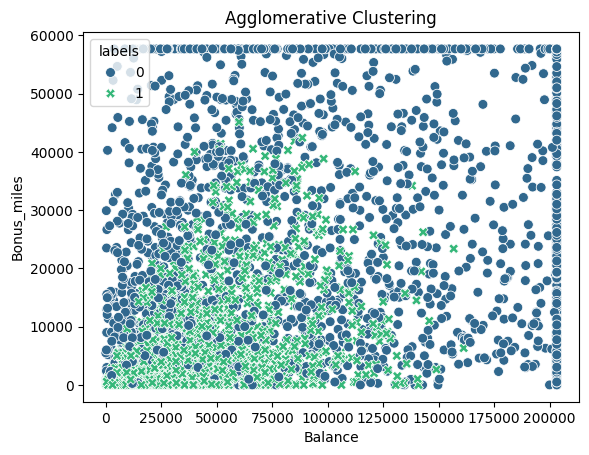

In [82]:
sns.scatterplot(
    data=new_data,
    x='Balance',
    y='Bonus_miles',
    hue='labels',
    palette='viridis',
    s=50,
    style='labels',
)
plt.title('Agglomerative Clustering')

In [83]:
new_data['labels'].value_counts()

,count
labels,
1,2051
0,1947


Text(0.5, 1.0, 'DBScan Clustering')

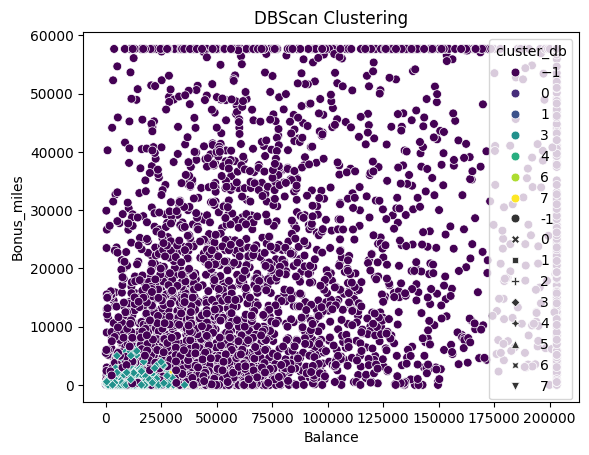

In [84]:
sns.scatterplot(
    data=df_db,
    x='Balance',
    y='Bonus_miles',
    hue='cluster_db',
    palette='viridis',
    s=40,
    style='cluster_db'
)
plt.title('DBScan Clustering')

Text(0.5, 1.0, 'Kmeans Clustering')

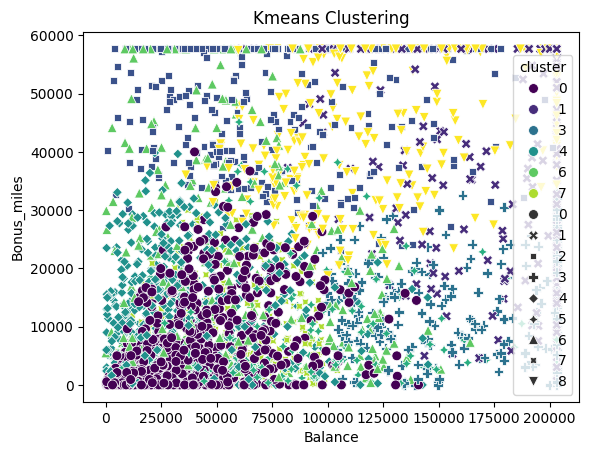

In [43]:
sns.scatterplot(
    data=df_loc,
    x='Balance',
    y='Bonus_miles',
    hue='cluster',
    palette='viridis',
    s=50,
    style='cluster'
)
plt.title('Kmeans Clustering')

In [44]:

new_data.head(2)

,Balance,Qual_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_trans_12,Days_since_enroll,Award?,labels
ID#,,,,,,,,,
1,28143.0,0.0,1.0,1.0,174.0,0.0,7000.0,0.0,1
2,19244.0,0.0,1.0,1.0,215.0,0.0,6968.0,0.0,1


In [45]:
# Agglomerative Clustering
new_data['labels'].value_counts()

,count
labels,
1,2051
0,1947


In [46]:
df_db.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_db
ID#,,,,,,,,,,,,
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0


In [47]:
# DBScan
df_db['cluster_db'].value_counts()

,count
cluster_db,
0,3998


In [48]:
df_loc.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,silhouette
ID#,,,,,,,,,,,,,
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,7,0.581556
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,7,0.576872


In [49]:
# Kmeans
df_loc['cluster'].value_counts()

,count
cluster,
0,1002
7,777
4,585
2,320
6,287
1,265
5,258
3,253
8,251


In [50]:
import scipy.cluster.hierarchy as sch


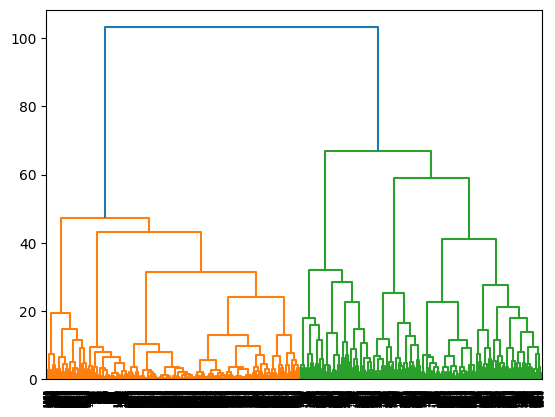

In [51]:
dendrogram = sch.dendrogram(sch.linkage(X_p,method='ward'))

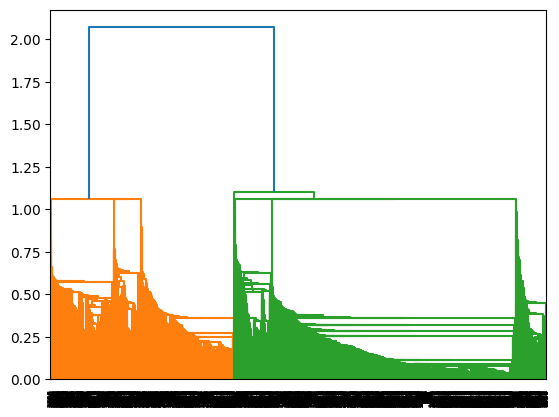

In [52]:
dendrogram = sch.dendrogram(sch.linkage(X_p,method='single'))

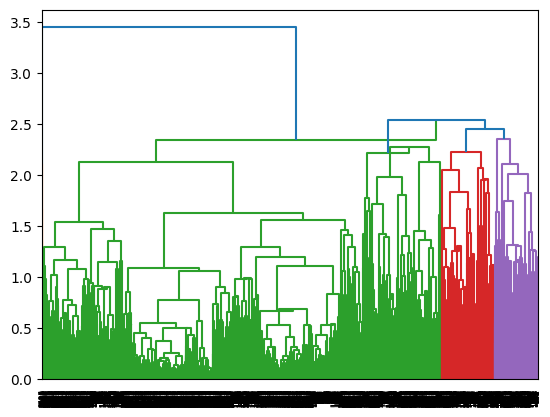

In [53]:
dendrogram = sch.dendrogram(sch.linkage(X_p,method='centroid'))

## **insights**

### **1. Agglomerative Clustering**

```
Cluster 1 = 2051 customers
Cluster 0 = 1947 customers
```
* Balanced split (~51% vs 49%).

* Suggests Agglomerative detected two broad customer groups:

* Likely “loyal / high-value” vs “low-value / infrequent flyers”.

* Easy to explain but maybe too coarse


### **2. DBSCAN**

```
Noise (-1): 2670 customers (≈ 67%)
Cluster 0: 1212 customers
Tiny clusters: 5–20 customers each
```

* DBSCAN is very sensitive to parameter choice (eps, min_samples).

* Here, the majority are marked as noise/outliers.

Only one meaningful cluster (Cluster 0 with 1212 members).

### 3. **KMeans**

```
Cluster 0: 1002
Cluster 7: 777
Cluster 4: 585
Cluster 2: 320
Cluster 6: 287
Cluster 1: 265
Cluster 5: 258
Cluster 3: 253
Cluster 8: 251
```
* Nice distribution across 9 clusters (no extreme imbalance like DBSCAN).

* KMeans captured different customer archetypes:

* Large clusters (0, 7, 4) → the mainstream flyer segments.

* Smaller clusters (2, 6, 1, 5, 3, 8)  niche but distinct groups (e.g., high-balance elite customers, very new vs very old enrollees, award-seekers).

* Likely the most actionable clustering because the clusters are well spread.
